In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from comet_ml import Experiment
import numpy as np
import scipy.spatial
import pandas as pd
import comet_ml
import sklearn.decomposition
import matplotlib.pyplot as plt
# import keras
from sklearn import preprocessing
from sklearn.metrics import pairwise_distances,mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from utils.readProfiles import readMergedProfiles
from utils.pred_models import *
from utils.saveAsNewSheetToExistingFile import saveAsNewSheetToExistingFile
from multiprocessing import Pool

sns.set_style("whitegrid")
# from utils import networksEvol, tsne, readProfiles
import umap

#### Paths

In [4]:
procProf_dir='/home/ubuntu/datasetsbucket/Rosetta-GE-CP/'
# procProf_dir='/home/ubuntu/bucket/projects/2018_04_20_Rosetta/workspace/'
metadata_dir='/home/ubuntu/bucket/projects/2018_04_20_Rosetta/workspace/metadata/'
results_dir='./results/'

In [186]:
# pd.__version__
filename=results_dir+'/SingleGenePred/scores2.xlsx'
saved_scores2=pd.read_excel(filename, sheet_name=None)
saved_scores2.keys()

dict_keys(['Lasso-LINCS-nvs-filt-10-ht', 'Lasso-CDRP-bio-nvs-filt-10-ht', 'Lasso-TAORF-nvs-filt-10-ht', 'MLP-LINCS-nvs-filt-10-ht'])

In [25]:
filename=results_dir+'/SingleGenePred/scores_hyperParam.xlsx'
saved_scores=pd.read_excel(filename, sheet_name=None)
saved_scores.keys()

dict_keys(['MLP-LUAD-nvs-filt-9-ht', 'Lasso-LUAD-nvs-filt-9-ht', 'MLP-TAORF-nvs--5-ht', 'Lasso-TAORF-nvs--5-ht', 'MLP-LINCS-nvs-filt-25-ht', 'Lasso-LINCS-nvs-filt-25-ht', 'MLP-CDRP-bio-nvs-filt-6-ht', 'Lasso-CDRP-bio-nvs-filt-6-ht'])

In [276]:
filename=results_dir+'/SingleGenePred/scores.xlsx'
saved_scores=pd.read_excel(filename, sheet_name=None)
saved_scores.keys()

dict_keys(['MLP-LUAD-n--filt-9', 'Lasso-LUAD-n-filt-9', 'MLP-LUAD-n-filt-9', 'Lasso-TAORF-n-filt-5', 'MLP-TAORF-n-filt-5', 'Lasso-LINCS-nd-filt-25', 'MLP-LINCS-nd-filt-25', 'Lasso-CDRP-bio-n-filt-6', 'MLP-CDRP-bio-n-filt-6', 'Lasso-LUAD-n--26', 'MLP-LUAD-n--26', 'Lasso-TAORF-n--7', 'MLP-TAORF-n--7', 'Lasso-LINCS-n--70', 'MLP-LINCS-n--70', 'Lasso-CDRP-bio-n--95', 'Lasso-LUAD-nvs--26', 'MLP-LUAD-nvs--26', 'Lasso-TAORF-nvs--7', 'MLP-TAORF-nvs--7', 'Lasso-LINCS-nvs--70', 'MLP-LINCS-nvs--70', 'Lasso-CDRP-bio-nvs--95', 'MLP-CDRP-bio-nvs--95', 'Lasso-CDRP-nvs--40', 'Lasso-LUAD-nvs-filt-9', 'Lasso-TAORF-nvs-filt-5', 'MLP-TAORF-nvs-filt-5', 'Lasso-LINCS-nvs-filt-25', 'Lasso-CDRP-bio-nvs-filt-6', 'MLP-LUAD-nvs-filt-9', 'MLP-LINCS-nvs-filt-25', 'MLP-CDRP-bio-nvs-filt-6', 'MLP-CDRP-nvs--40', 'MLP-TAORF-nvs--5', 'Lasso-TAORF-nvs--5', 'Lasso-LUAD-nvs-filt-9-ht', 'Lasso-TAORF-nvs-filt-5-ht', 'Lasso-LINCS-nvs-filt-25-ht', 'Lasso-CDRP-bio-nvs-filt-6-ht', 'Lasso-TAORF-nvs--5-ht', 'MLP-LUAD-nvs-filt-9-ht

In [257]:
saved_scores['MLP-LINCS-nvs-filt-25']=saved_scores2['MLP-LINCS-nvs-filt-10-ht']
saved_scores['MLP-LUAD-nvs-filt-9']=saved_scores['MLP-LUAD-nvs-filt-9-ht']

In [22]:
# saved_scores["MLP-LUAD-nvs-filt-9-ht"]
saved_scores["MLP-TAORF-nvs--5-ht"]
# saved_scores["MLP-LINCS-nvs-filt-25-ht"]
# saved_scores["MLP-CDRP-bio-nvs-filt-6-ht"]

,Unnamed: 0,lmGens,pred score,d
0,0,PSME1,0.523181,n-folds
1,1,PSME1,0.387390,n-folds
2,2,PSME1,0.206841,n-folds
3,3,PSME1,0.052475,n-folds
4,4,PSME1,0.270965,n-folds
...,...,...,...,...
9775,9775,LYRM1,-0.063460,random
9776,9776,LYRM1,-0.082249,random
9777,9777,LYRM1,0.025282,random
9778,9778,LYRM1,-0.048237,random


In [14]:
saved_scores["MLP-LUAD-nvs-filt-9"][saved_scores["MLP-LUAD-nvs-filt-9"]['d']=='random']

,Unnamed: 0,lmGens,pred score,d
8802,8802,AARS,-0.076631,random
8803,8803,AARS,-0.073072,random
8804,8804,AARS,-0.073504,random
8805,8805,AARS,0.049091,random
8806,8806,AARS,-0.085746,random
...,...,...,...,...
17599,17599,ZW10,-0.304624,random
17600,17600,ZW10,-0.173387,random
17601,17601,ZW10,-0.170258,random
17602,17602,ZW10,-0.073142,random


In [23]:
saved_scores["MLP-TAORF-nvs--5-ht"][saved_scores["MLP-TAORF-nvs--5-ht"]['d']=='random']=\
saved_scores["MLP-TAORF-nvs--5"][saved_scores["MLP-TAORF-nvs--5"]['d']=='random']

In [193]:

# pred_df=saved_scores['Lasso-LINCS-nvs-filt-25-ht']
# pred_df=saved_scores['MLP-LINCS-nvs-filt-25']

# pred_df=saved_scores['Lasso-LUAD-nvs-filt-9-ht']
# pred_df=saved_scores['MLP-LUAD-nvs-filt-9']

# pred_df=saved_scores['Lasso-TAORF-nvs-filt-5-ht']
# pred_df=saved_scores['MLP-TAORF-nvs-filt-5']

pred_df=saved_scores['Lasso-TAORF-nvs--5-ht']
# pred_df=saved_scores['MLP-TAORF-nvs--5']

# pred_df=saved_scores['Lasso-CDRP-bio-nvs-filt-6-ht']
# pred_df=saved_scores['MLP-CDRP-bio-nvs-filt-6']

# pred_df=saved_scores['Lasso-CDRP-nvs-filt-6-ht']
# pred_df=saved_scores['MLP-CDRP-nvs--40']

# print(np.percentile(pred_df[pred_df['d']=='random'].groupby('lmGens').median()['pred score'].values,99))
# pred_df=pred_df[pred_df['d']=='n-folds'].groupby('lmGens').median()
# pred_df.sort_values(by='pred score')[pred_df.sort_values(by='pred score')['pred score']>0.2].shape
# # pred_df

In [ ]:
writer = pd.ExcelWriter('scores_hyperParam.xlsx', engine='xlsxwriter')

# Write each dataframe to a different worksheet.
df1.to_excel(writer, sheet_name='Sheet1')
df2.to_excel(writer, sheet_name='Sheet2')
df3.to_excel(writer, sheet_name='Sheet3')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [99]:
pred_df.sort_values(by='pred score')[pred_df.sort_values(by='pred score')['pred score']>0.2].shape

(222, 2)

/home/ubuntu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ubuntu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ubuntu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

0.0028046231138199214
0.0222098002804532


/home/ubuntu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ubuntu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ubuntu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

0.007794128763638747
0.04012924531528106


/home/ubuntu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ubuntu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ubuntu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

-0.006114334877965981
-0.0027460760970467


/home/ubuntu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ubuntu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ubuntu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

0.01430587501266917
0.025694778572532016


/home/ubuntu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


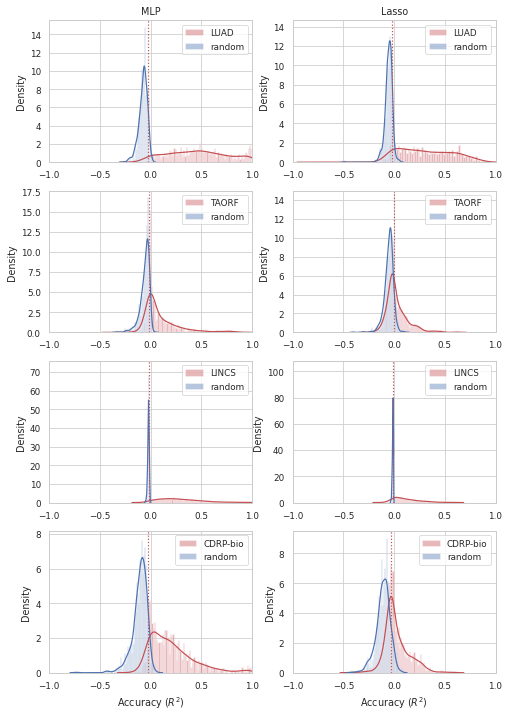

In [26]:
################################################
# dataset options: 'CDRP' , 'LUAD', 'TAORF', 'LINCS', 'CDRP-bio'
datasets=['LUAD', 'TAORF', 'LINCS', 'CDRP-bio'];
# datasets=['LUAD', 'TAORF', 'LINCS', 'CDRP-bio','CDRP'];

DT_kfold={'LUAD':9, 'TAORF':5, 'LINCS':25, 'CDRP-bio':6,'CDRP':40}

################################################
# CP Profile Type options: 'augmented' , 'normalized', 'normalized_variable_selected'
profileType='normalized_variable_selected'
profTypeAbbrev=''.join([s[0] for s in profileType.split('_')])

################################################
# filtering to compounds which have high replicates for both GE and CP datasets
highRepOverlapEnabled=1


################################################
pertColName='PERT'
profileLevel='treatment'; #'replicate'  or  'treatment'
if highRepOverlapEnabled:
    f='filt'
else:
    f=''
    
models=["MLP","Lasso"]

DataPredResults=pd.DataFrame(columns=["Dataset","Model"])

fig, axes = plt.subplots(len(datasets),len(models),figsize=(4*len(models),3*len(datasets)))
sns.set_context("paper")
sns.set_style("whitegrid")
# sns.rcParams['patch.force_edgecolor'] = True
# for d in range(5):#(len(datasets)):
for d in range(len(datasets)):
    for m in range(len(models)):
                              
            
        if datasets[d]=='TAORF' or datasets[d]=='CDRP':     
            f=''
        else:
            f='filt'            

        k_fold=DT_kfold[datasets[d]] 
        sheetName=models[m]+'-'+datasets[d]+'-'+profTypeAbbrev+'-'+f+'-'+str(k_fold)+'-ht'
#         if models[m]=='Lasso':     
#             sheetName=models[m]+'-'+datasets[d]+'-'+profTypeAbbrev+'-'+f+'-'+str(k_fold)+'-ht'
#         else:
#             sheetName=models[m]+'-'+datasets[d]+'-'+profTypeAbbrev+'-'+f+'-'+str(k_fold)      

            
        
            
        res_sheet=saved_scores[sheetName]

        d_to_pl=res_sheet.groupby(['lmGens','d']).median().reset_index()   
        
        d_to_pl_2=d_to_pl.copy()
        d_to_pl_2['Dataset']=datasets[d]
        d_to_pl_2['Model']=models[m]
        
        
        
        # axes=sns.displot(data=d_to_pl, x="pred score", hue="d")
        #     sns.distplot(saved_scores['Lasso-'+datasets[d]+filter_status[d]].pred_score.values,kde=True,hist=True,bins=100,label=datasets[d],ax=axes,norm_hist=True);
        pred_scoress=d_to_pl[d_to_pl["d"]=="n-folds"]["pred score"].values
#         pred_scoress=res_sheet[res_sheet['d']=='n-folds']["pred score"].values
        rand_scoress=d_to_pl[d_to_pl["d"]=="random"]["pred score"].values
#         rand_scoress=res_sheet[res_sheet['d']=='random']["pred score"].values
        sns.distplot(pred_scoress,kde=True,hist=True,bins=100,label=datasets[d],ax=axes[d,m],norm_hist=True,color='r')
        sns.distplot(rand_scoress,kde=True,hist=True,bins=100,label='random',ax=axes[d,m],norm_hist=True)
        rand99th=np.percentile(rand_scoress,99)
        print(rand99th)
        
        d_to_pl_2['rand99th']=rand99th
        DataPredResults=DataPredResults.append(d_to_pl_2)
        
        
        axes[d,0].set_xlim(-1,1)
        axes[d,1].set_xlim(-1,1)
#         axes[d,1].set_xlim(-.5,.5)
#         axes[d,m].set_xlim(-0.5,0.6)
#         axes[d,m].set_ylim(0,15)
        axes[d,m].axvline(x=np.percentile(rand_scoress,90),linestyle=':',color='r');
        axes[len(datasets)-1,m].set_xlabel("Accuracy ($R^2$)");
        axes[d,m].legend();
        axes[0,m].set_title(models[m]);

DataPredResults.loc[DataPredResults['d']=='random','Model']=DataPredResults[DataPredResults['d']=='random']['Model']+'-'+DataPredResults[DataPredResults['d']=='random']['d']

In [7]:
d_to_pl

,lmGens,d,Unnamed: 0,pred score
0,AARS,n-folds,4,0.964530
1,AARS,random,8806,0.000000
2,ABCB6,n-folds,13,0.994643
3,ABCB6,random,8815,0.000000
4,ABCC5,n-folds,22,-0.010185
...,...,...,...,...
1951,ZNF586,random,17581,0.000000
1952,ZNF589,n-folds,8788,0.017031
1953,ZNF589,random,17590,0.000000
1954,ZW10,n-folds,8797,0.045092


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


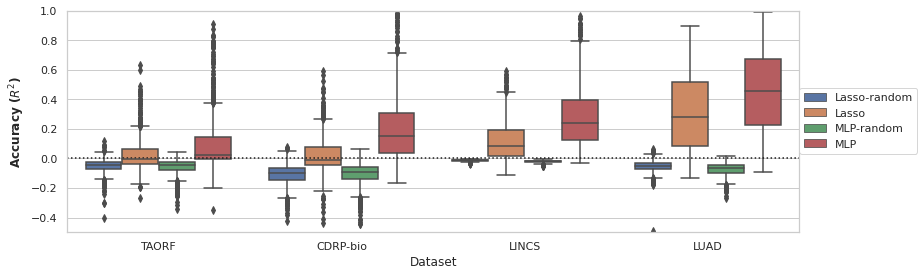

In [33]:

# DataPredResults
import matplotlib.style as style
style.use('seaborn-colorblind')
sns.set_context("paper",font_scale = 2, rc={"font.size":20,"axes.titlesize":8,"axes.labelsize":10})

# DataPredResults.loc[DataPredResults['d']=='random','Model']=DataPredResults[DataPredResults['d']=='random']['Model']+'-'+DataPredResults[DataPredResults['d']=='random']['d']
plt.figure(figsize=(13,4))

# plt.rcParams["axes.labelsize"] = 40
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="Dataset", y="pred score", hue="Model",data=DataPredResults,\
                order=['TAORF','CDRP-bio','LINCS','LUAD'], hue_order=['Lasso-random','Lasso','MLP-random','MLP'])
ax.set_ylim(-.5,1);
ax.set_ylabel("Accuracy ($R^2$)", fontweight='bold'); #fontsize=14,
ax.axhline(y=0,linestyle=':',color='k');
plt.tight_layout()
plt.legend(bbox_to_anchor=(1, .65), loc='upper left', borderaxespad=0)
plt.tight_layout()
plt.savefig('pred_gen_all_models2.eps')

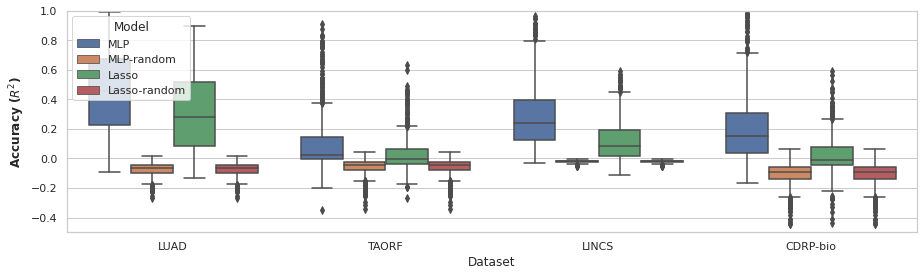

In [10]:
import matplotlib.style as style
style.use('seaborn-colorblind')
sns.set_context("paper",font_scale = 2, rc={"font.size":20,"axes.titlesize":8,"axes.labelsize":10})

# DataPredResults.loc[DataPredResults['d']=='random','Model']=DataPredResults[DataPredResults['d']=='random']['Model']+'-'+DataPredResults[DataPredResults['d']=='random']['d']
plt.figure(figsize=(13,4))

# plt.rcParams["axes.labelsize"] = 40
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="Dataset", y="pred score", hue="Model",data=DataPredResults)
ax.set_ylim(-.5,1);
# ax.set_ylim(-1.5,1);
ax.set_ylabel("Accuracy ($R^2$)", fontweight='bold'); #fontsize=14,
plt.tight_layout()

In [13]:
DataPredResults2=DataPredResults.loc[DataPredResults['d']!='random'].reset_index(drop=True)
DataPredResults2[DataPredResults2["pred score"]>0.25].groupby(['Dataset','Model']).size()

Dataset   Model
CDRP-bio  Lasso     70
          MLP       18
LINCS     Lasso     82
          MLP      121
LUAD      Lasso    543
          MLP      494
TAORF     Lasso     70
          MLP       25
dtype: int64

In [36]:
DataPredResults2=DataPredResults.loc[DataPredResults['d']!='random'].reset_index(drop=True)
DataPredResults2[DataPredResults2["pred score"]>0.25].groupby(['Dataset','Model']).size()

Dataset   Model
CDRP      MLP        2
CDRP-bio  Lasso     70
          MLP       15
LINCS     Lasso     82
          MLP      161
LUAD      Lasso    543
          MLP      455
TAORF     Lasso     44
          MLP       12
dtype: int64

In [35]:
DataPredResults2=DataPredResults.loc[DataPredResults['d']!='random'].reset_index(drop=True)
DataPredResults2[DataPredResults2["pred score"]>DataPredResults2['rand99th']+0.2].groupby(['Dataset','Model']).size()*100/978

Dataset   Model
CDRP-bio  Lasso     7.873211
          MLP      38.445808
LINCS     Lasso    23.210634
          MLP      60.429448
LUAD      Lasso    56.952965
          MLP      77.505112
TAORF     Lasso     4.601227
          MLP      17.791411
dtype: float64

In [254]:
DataPredResults2=DataPredResults.loc[DataPredResults['d']!='random'].reset_index(drop=True)
DataPredResults2[DataPredResults2["pred score"]>DataPredResults2['rand99th']+0.2].groupby(['Dataset','Model']).size()

Dataset   Model
CDRP-bio  Lasso     77
          MLP       29
LINCS     Lasso    227
          MLP      661
LUAD      Lasso    557
          MLP      518
TAORF     Lasso     45
          MLP       19
dtype: int64

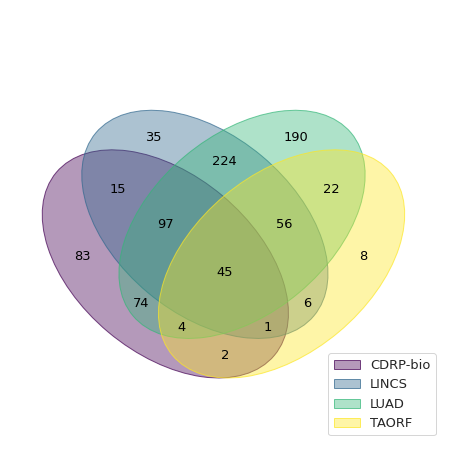

In [41]:
from venn import venn
mean_scores_df_top=DataPredResults2[DataPredResults2["pred score"]>0.25].reset_index(drop=True)

list_4_ven={}
dsets=["CDRP-bio","LINCS","LUAD", "TAORF"]
set_lab=tuple(dsets) 
# plt.figure()
for d in dsets:
    list_4_ven[d]=set(mean_scores_df_top[mean_scores_df_top["Dataset"]==d].lmGens)

# venn(list_4_ven,legend_loc='upper center')
venn(list_4_ven,legend_loc='lower right')
# plt.tight_layout()
# plt.savefig('pred_gen_venn.eps')

In [34]:
DataPredResults2=DataPredResults.loc[DataPredResults['d']!='random'].reset_index(drop=True)
DataPredResults2[DataPredResults2["pred score"]>DataPredResults2['rand99th']+0.2].groupby(['Dataset','Model']).size()

Dataset   Model
CDRP-bio  Lasso     77
          MLP      376
LINCS     Lasso    227
          MLP      591
LUAD      Lasso    557
          MLP      758
TAORF     Lasso     45
          MLP      174
dtype: int64

In [180]:
pred_scoress

array([ 2.34282881e-01, -1.33832692e-02, -4.03793417e-02, -8.29159430e-03,
       -1.33171784e-01,  5.83273527e-02,  2.18498500e-01, -5.41656423e-02,
        2.91059911e-02, -7.96666752e-03, -4.47403555e-02, -5.62418200e-02,
       -3.54507567e-02, -9.52716222e-03, -3.51376820e-02, -6.93898763e-02,
        3.12461048e-02, -7.78334687e-02,  2.37769435e-02,  8.74947132e-02,
       -2.78588662e-02,  2.85935087e-02, -4.17350460e-03, -6.26994694e-02,
        1.37383443e-01, -4.94019933e-02,  3.08050123e-01,  8.47699950e-03,
       -6.17422735e-02, -3.50111519e-02, -3.28200760e-02,  1.84729352e-02,
       -1.28983827e-01, -2.79655508e-03, -3.87388621e-02, -1.63301869e-01,
        5.18819953e-02,  6.73359845e-02,  1.32616246e-01, -3.62265927e-01,
       -8.09248336e-02,  3.79314451e-02,  2.29532618e-01,  4.99365801e-02,
       -3.02892012e-02,  1.31108119e-01, -2.56289585e-02, -4.23784820e-02,
       -1.10775626e-02, -4.64553662e-02, -5.01659668e-02, -1.91374262e-02,
        8.38984792e-02, -

In [195]:
unq_lmgenes=DataPredResults2['lmGens'].unique()

In [197]:
d_luad=DataPredResults2[DataPredResults2['Dataset']=='LUAD'].reset_index(drop=True)
d_cdrpbio=DataPredResults2[DataPredResults2['Dataset']=='CDRP-bio'].reset_index(drop=True)
d_lincs=DataPredResults2[DataPredResults2['Dataset']=='LINCS'].reset_index(drop=True)
d_taorf=DataPredResults2[DataPredResults2['Dataset']=='TAORF'].reset_index(drop=True)

# unq_lmgenes

In [245]:
cols=["CDRP-bio-Lasso","CDRP-bio-MLP",\
                                                    "LUAD-Lasso","LUAD-MLP",\
                                                    "LINCS-Lasso","LINCS-MLP",\
                                                    "TAORF-Lasso","TAORF-MLP"]
DataAppendix=pd.DataFrame(index=unq_lmgenes,columns=cols)

for ds in ['LUAD', 'TAORF', 'LINCS', 'CDRP-bio']:
    for m in ['Lasso','MLP']:
        d_luad=DataPredResults2[DataPredResults2['Dataset']==ds].reset_index(drop=True)
        d_luad2=d_luad[(d_luad["Model"]==m)]
        DataAppendix.loc[d_luad2["lmGens"].values,ds+"-"+m]=d_luad2["pred score"].values
DataAppendix[cols]=DataAppendix[cols]*100
DataAppendix[cols]=DataAppendix[cols].astype(float).round(2)

In [226]:
# DataAppendix.loc[unq_lmgenes.tolist()]

In [248]:
DataAppendix.shape
    
# DataAppendix[unq_lmgenes,"LUAD-MLP"]=d_luad[(d_luad["lmGens"].isin(unq_lmgenes))&(d_luad["Model"]=='MLP')]["pred score"]

(1170, 8)

In [249]:
# DataAppendix[(d_luad["lmGens"].isin(unq_lmgenes))]
# DataAppendix
# d_luad=DataPredResults2[DataPredResults2['Dataset']=='LUAD'].reset_index(drop=True)
# DataAppendix[0:60]
range(0,60*20,60)

range(0, 1200, 60)

In [252]:
# d_luad["lmGens"]
# DataAppendix.loc[d_luad["lmGens"].values]
for i in range(0,55*20,55):
    print("\\begin{table}")
    print(DataAppendix[i:i+55].to_latex(index=True))  
    print("\end{table}")

In [233]:
DataAppendix=DataAppendix*100

,CDRP-bio-Lasso,CDRP-bio-MLP,LUAD-Lasso,LUAD-MLP,LINCS-Lasso,LINCS-MLP,TAORF-Lasso,TAORF-MLP
AARS,23.4283,-1.69999,61.7998,59.3005,27.0526,76.3724,-0.638451,-2.07299
ABCB6,-4.03793,-1.4122,74.3228,67.7788,34.5882,82.3665,5.84286,11.9624
ABCC5,-0.829159,1.6296,-3.27304,-0.0411913,-2.65991,1.78172,-7.57148,-3.72142
ABCF1,-13.3172,-18.7696,10.3142,11.4563,20.8011,38.8232,-0.160389,1.73939
ABCF3,5.83274,-6.91862,44.7308,25.9902,-6.82371,59.2254,13.3848,-4.53288
...,...,...,...,...,...,...,...,...
ZGPAT,-8.37141,-5.37903,NaN,NaN,NaN,NaN,NaN,NaN
ZNF629,-5.12793,-9.05695,NaN,NaN,NaN,NaN,NaN,NaN
ZNF672,8.27284,7.25022,NaN,NaN,NaN,NaN,NaN,NaN
ZNF692,-5.53887,-7.91229,NaN,NaN,NaN,NaN,NaN,NaN
